<a href="https://colab.research.google.com/github/DH1929ds/1/blob/main/1%EC%B0%A8_%EC%A7%84%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1차 진도 스터디**

---


강의 정리 : 12강 ~ 18강

코드 리뷰 : 15, 17, 18 example

추가 코드 리뷰

---



#**강의 정리**

**머신러닝** : 데이터를 이용하여 특성과 패턴을 학습하여 미지의 데이터에 대한 미래값을 예측

-지도 학습 : regression / classification

-비지도 학습 : clustering => 정답 X, 패턴 특성들을 학습을 통해 발결하는 방법

* 딥러닝 : 인공신경망을 사용 => 머신러닝에 속함





**Regression**

y = Wx+b 에서 W(weight)와 b(bias)를 찾는 과정

error = t-y = t-(Wx+b)
loss function : t와 x에 대한 y의 차이를 모두 더한것

$E(W,b) = \frac{1}{n}\sum[t_i-y_i]^2$ => W와 b에 영향을 받는 함수



**gradient decent algorithm**

loss f의 최소를 찾기 위한 방법

임의의 가중치를 선택 후, 기울기를 계산해 그 값이 작아지는 방향으로 업데이트를 진행하여 더이상 작아지지 않는 곳을 찾음.

$W = W-\alpha\frac{∂E(W,b)}{∂W}$ 이때 $\alpha$는 learning rate : 얼마나 기울기 방향으로 진행할 것인가

$b = b-\alpha\frac{∂E(W,b)}{∂b}$ 

=> 손실함수를 최소화 시키는 W, b를 구함

**linear regression** 실행

$E(W,b) = \frac{1}{n}\sum[t_i-(Wx+b)]^2$에서 W와 x를 numpy array로 설정하여 계산!

y = numpy.dot(x,W) + b

1. numpy.array의 reshape을 이용하여 data를 array 형식으로 준비
2. $y = Wx + b$에서 $W$와 $b$를 rand를 이용해 임의의 값으로 초기화
3. loss function $E(W,b)$ 정의 => def loss(x,t) x를 입력받아 W와 b를 이용해 y를 계산한 후 t와의 loss function을 계산
4. 수치미분 함수 정의
5. learning rate 설정 및 traning 진행 W,b를 기울기와 learning rate에 따라 조정


**Multi variable**
$y = x_1W_1+x_2W_2+x_3W_3+b$

이때 $x_1,x_2,x_3$와 $W_1,W_2,W_3$를 array로 설정하여 위와 동일하게 진행

$y = XW+b$

**Classification**

logistic regression 알고리즘 => 최적의 직선을 찾고 그 지준으로 분류 : deep learning에서 기본 componet



**Sigmid 함수**

$S(x) = \frac{1}{1+e^{-x}}$

: 0과 1사이로 출력을 반환하기 위해서 classification에서 많이 사용!


**loss function**

classification의 경우 논리적으로 1,0이기 때문에 연속적인 값을 갖는 regression과 다른 loss function이 필요!

=>cross-entropy

$E(W,b) = -\sum {t_i\log{y_i+(1-t)\log(1-y_i)}}$

=>log 부분에 매우 작은 값인 delta를 더해줘서 발산하지 않도록함!

**학습 진행**

1. data 준비
2. $Z = Wx+b$ 정의 및 $W,b$ 초기화
3. 손실함수 $E(W,b)$ 정의
4. 수치 미분 함수 정의
5. 학습률 지정 및 학습 진행

$X$ -> $Z = XW+b$ -> sigmoid($Z$) -> Y



---



#**코드 리뷰**



#15강 example1

In [ ]:
import numpy as np

x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1)
t_data = np.array([2, 3, 4, 5, 6]).reshape(5,1) 

# raw_data = [ [1, 2], [2, 3], [3, 4], [4, 5], [5, 6] ]

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

### x, t 데이터를 numpy array로 만들기

x_data.shape =  (5, 1) , t_data.shape =  (5, 1)


In [ ]:
W = np.random.rand(1,1)  
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

### W, b 임의의 값으로 초기화

W =  [[0.91081498]] , W.shape =  (1, 1) , b =  [0.53962309] , b.shape =  (1,)


In [ ]:
def loss_func(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

### loss function 정의 x,W,b로 부터 나온 y와 정답 t의 차의 제곱들의 평균

In [ ]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

### f는 loss function 계산 함수 즉 미분하려는 함수, x는 W, b 등 grad를 구하고자 하는 변수
### 함수와 변수를 넣어 grad를 계산하여 반환하는 함수
### x 값이 미세하게 변할 때 기울기를 계산 미분 정의

In [ ]:
# 손실함수 값 계산 함수
# 입력변수 x, t : numpy type
def error_val(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
# 입력변수 x : numpy type
def predict(x):
    y = np.dot(x,W) + b
    
    return y

### loss function 계산하는 함수, W와 b로 예측값 y를 예측하는 함수 

In [ ]:
learning_rate = 1e-2  # 발산하는 경우, 1e-3 ~ 1e-6 등으로 바꾸어서 실행

f = lambda x : loss_func(x_data,t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

for step in  range(8001):  
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 400 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, ", b = ",b )

### training 진행 f : X를 입력받아 loss function을 계산하는 함수
### learning rate만큼 W와 b를 grad 방향으로 업데이트하며 W와 b를 구함.  

Initial error value =  0.5457928739081883 Initial W =  [[0.91081498]] 
 , b =  [0.53962309]
step =  0 error value =  0.3335431452308827 W =  [[0.9580583]] , b =  [0.55134713]
step =  400 error value =  0.001997917024423249 W =  [[1.02902588]] , b =  [0.895233]
step =  800 error value =  0.00012747891778933074 W =  [[1.00733189]] , b =  [0.97353603]
step =  1200 error value =  8.13390860685407e-06 W =  [[1.00185202]] , b =  [0.99331525]
step =  1600 error value =  5.189914565640152e-07 W =  [[1.00046782]] , b =  [0.99831144]
step =  2000 error value =  3.3114723192104184e-08 W =  [[1.00011817]] , b =  [0.99957347]
step =  2400 error value =  2.112915112977469e-09 W =  [[1.00002985]] , b =  [0.99989226]
step =  2800 error value =  1.348164757083625e-10 W =  [[1.00000754]] , b =  [0.99997279]
step =  3200 error value =  8.602088182755315e-12 W =  [[1.0000019]] , b =  [0.99999313]
step =  3600 error value =  5.488640814329484e-13 W =  [[1.00000048]] , b =  [0.99999826]
step =  4000 error v

In [ ]:
predict(43) 

array([[44.]])

#15강 example2

multi-variable regression 

3개의 변수를 통해 y값 하나를 예측 => W가 (3,1)로 변경, 이외는 거의 동

In [ ]:
import numpy as np

loaded_data = np.loadtxt('./data-01-test-score.csv', delimiter=',', dtype=np.float32)

x_data = loaded_data[ :, 0:-1]
t_data = loaded_data[ :, [-1]]

# 데이터 차원 및 shape 확인
print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 

### 데이터가 (25,3)인 것을 보면 변수가 1개에서 3개로 바뀐 것을 알 수 있음.

x_data.ndim =  2 , x_data.shape =  (25, 3)
t_data.ndim =  2 , t_data.shape =  (25, 1)


In [ ]:
W = np.random.rand(3,1)  # 3X1 행렬
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

### 데이터가 바뀜에 따라 W의 size도 변경, 초기화 해줌

W =  [[0.98027189]
 [0.47208321]
 [0.34837379]] , W.shape =  (3, 1) , b =  [0.26063884] , b.shape =  (1,)


In [ ]:
def loss_func(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

### 이전과 동일

In [ ]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad
    
### 이전과 동일

In [ ]:
# 손실함수 값 계산 함수
# 입력변수 x, t : numpy type
def error_val(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
# 입력변수 x : numpy type
def predict(x):
    y = np.dot(x,W) + b
    
    return y
    
### 이전과 동일

In [ ]:
learning_rate = 1e-5  # 1e-2, 1e-3 은 손실함수 값 발산

f = lambda x : loss_func(x_data,t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

for step in  range(10001):  
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 400 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, ", b = ",b )

### 이전과 동일

Initial error value =  365.79561537005173 Initial W =  [[0.98027189]
 [0.47208321]
 [0.34837379]] 
 , b =  [0.26063884]
step =  0 error value =  148.6279086959516 W =  [[1.00975393]
 [0.50182964]
 [0.37914459]] , b =  [0.26086264]
step =  400 error value =  17.724503283246605 W =  [[0.98767171]
 [0.52074917]
 [0.51940311]] , b =  [0.26128775]
step =  800 error value =  15.08261267595033 W =  [[0.92630048]
 [0.50017005]
 [0.59915772]] , b =  [0.26126279]
step =  1200 error value =  13.082189130910518 W =  [[0.8709764 ]
 [0.48503899]
 [0.66771252]] , b =  [0.26114894]
step =  1600 error value =  11.558274939252076 W =  [[0.82109014]
 [0.47426909]
 [0.7267217 ]] , b =  [0.26095856]
step =  2000 error value =  10.390386784134085 W =  [[0.77609586]
 [0.46696948]
 [0.77758616]] , b =  [0.26070218]
step =  2400 error value =  9.490091713692165 W =  [[0.7355043 ]
 [0.4624116 ]
 [0.82149323]] , b =  [0.26038881]
step =  2800 error value =  8.792140942799504 W =  [[0.69887666]
 [0.46000111]
 [0.

In [ ]:
test_data = np.array([100, 98, 81])

predict(test_data) 

array([179.57640912])

# 17강 example1

Classification

In [ ]:
import numpy as np

x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1)   
t_data = np.array([0, 0, 0, 0,  0,  0,  1,  1,  1,  1]).reshape(10,1)

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

### regression과 다르게 0,1로 labeling 되어있는 것을 확인 가능

x_data.shape =  (10, 1) , t_data.shape =  (10, 1)


In [ ]:
W = np.random.rand(1,1)  
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

### 변수 초기화

W =  [[0.07857329]] , W.shape =  (1, 1) , b =  [0.97076124] , b.shape =  (1,)


In [ ]:
# 최종출력은 y = sigmoid(Wx+b) 이며, 손실함수는 cross-entropy 로 나타냄

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def loss_func(x, t):
    
    delta = 1e-7    # log 무한대 발산 방지
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    # cross-entropy 
    return  -np.sum( t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ) ) 

### regression과 차이점 : 마지막 출력값이 sigmoid로 출력되기에 sigmoid function을 정의
### loss function의 경우에도 y를 계산할 때 sigmoid를 추가하여 계산하고 cross-entropy를 사용

In [ ]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

### 이전과 동일

In [ ]:
# 손실함수 값 계산 함수
# 입력변수 x, t : numpy type
def error_val(x, t):
    delta = 1e-7    # log 무한대 발산 방지
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    # cross-entropy 
    return  -np.sum( t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ) ) 

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
# 입력변수 x : numpy type
def predict(x):
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    if y >= 0.5:
        result = 1  # True
    else:
        result = 0  # False
    
    return y, result

### predict 과정에서 sigmoid를 사용하여 y값을 계산하고 0.5를 기준으로 1과 0으로 출력

In [ ]:
learning_rate = 1e-2  # 발산하는 경우, 1e-3 ~ 1e-6 등으로 바꾸어서 실행

f = lambda x : loss_func(x_data,t_data)  # f(x) = loss_func(x_data, t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

for step in  range(10001):  
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 400 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, ", b = ",b )

### training 진행

Initial error value =  10.727329739382212 Initial W =  [[0.07857329]] 
 , b =  [0.97076124]
step =  0 error value =  13.982121846727386 W =  [[-0.21179204]] , b =  [0.98452966]
step =  400 error value =  2.870742707874972 W =  [[0.27216203]] , b =  [-4.05103978]
step =  800 error value =  1.7917149212529047 W =  [[0.45134138]] , b =  [-5.61410573]
step =  1200 error value =  1.522499688344847 W =  [[0.52917189]] , b =  [-6.65054115]
step =  1600 error value =  1.3554980393492841 W =  [[0.5907049]] , b =  [-7.467698]
step =  2000 error value =  1.2382125916177633 W =  [[0.64240017]] , b =  [-8.15270151]
step =  2400 error value =  1.1495527649132113 W =  [[0.68742923]] , b =  [-8.74830813]
step =  2800 error value =  1.079189549940599 W =  [[0.72760203]] , b =  [-9.2788969]
step =  3200 error value =  1.0213847953970538 W =  [[0.76405681]] , b =  [-9.7597831]
step =  3600 error value =  0.9726582241128355 W =  [[0.79755989]] , b =  [-10.20126598]
step =  4000 error value =  0.9307575954

In [ ]:
(real_val, logical_val) = predict(3) 

print(real_val, logical_val)

### 3의 경우 0으로 예측 real_val은 0.5 기준으로 나누기 이전의 실제 값

[[1.12486956e-05]] 0


In [ ]:
(real_val, logical_val) = predict(17) 

print(real_val, logical_val)

### 17의 경우 1로 예측 real_val은 0.5 기준으로 나누기 이전의 실제 값

[[0.99127264]] 1


#17강 example2

예습, 복습시간 data로 pass fail 예측하는 모델

변수 2개라는 것 외에 전과 동일

In [ ]:
# x_data = (예습시간, 복습시간)
# t_data = 1 (Pass), 0 (Fail)

import numpy as np

x_data = np.array([ [2, 4], [4, 11], [6, 6], [8, 5], [10, 7], [12, 16], [14, 8], [16, 3], [18, 7] ])
t_data = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(9, 1)

# 데이터 차원 및 shape 확인
print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 

### 변수가 2종류

x_data.ndim =  2 , x_data.shape =  (9, 2)
t_data.ndim =  2 , t_data.shape =  (9, 1)


In [ ]:
W = np.random.rand(2, 1)  # 2X1 행렬
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

### W도 2개로 지정, 초기화

W =  [[0.65806195]
 [0.15861006]] , W.shape =  (2, 1) , b =  [0.61253327] , b.shape =  (1,)


In [ ]:
# classification 이므로 출력함수로 sigmoid 정의

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [ ]:
# 최종출력은 y = sigmoid(Wx+b) 이며, 손실함수는 cross-entropy 로 나타냄

def loss_func(x, t):
    
    delta = 1e-7    # log 무한대 발산 방지
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    # cross-entropy 
    return  -np.sum( t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ) )  

In [ ]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [ ]:
def error_val(x, t):
    delta = 1e-7    # log 무한대 발산 방지
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    # cross-entropy 
    return  -np.sum( t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ) )  

def predict(x):
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    if y > 0.5:
        result = 1  # True
    else:
        result = 0  # False
    
    return y, result

In [ ]:
learning_rate = 1e-2  # 1e-2, 1e-3 은 손실함수 값 발산

f = lambda x : loss_func(x_data,t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

for step in  range(80001):  
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 400 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, ", b = ",b )

Initial error value =  19.82172381647415 Initial W =  [[0.65806195]
 [0.15861006]] 
 , b =  [0.61253327]
step =  0 error value =  9.606422170000009 W =  [[ 0.46014489]
 [-0.09745088]] , b =  [0.57799064]
step =  400 error value =  2.287643694478578 W =  [[ 0.41851198]
 [-0.08803245]] , b =  [-2.59537263]
step =  800 error value =  1.5968133646355984 W =  [[ 0.53495556]
 [-0.02698285]] , b =  [-4.24507081]
step =  1200 error value =  1.2829367406630594 W =  [[0.62236532]
 [0.00862003]] , b =  [-5.36160359]
step =  1600 error value =  1.1000515494915892 W =  [[0.69287043]
 [0.03392848]] , b =  [-6.21481209]
step =  2000 error value =  0.9779741215574141 W =  [[0.75226859]
 [0.05405573]] , b =  [-6.91211364]
step =  2400 error value =  0.8892331040362111 W =  [[0.80375255]
 [0.07126357]] , b =  [-7.50667413]
step =  2800 error value =  0.820869416075343 W =  [[0.84927002]
 [0.08671937]] , b =  [-8.02851983]
step =  3200 error value =  0.76595879065599 W =  [[0.89010082]
 [0.10108715]] , b

In [ ]:
test_data = np.array([3, 17]) # (예습, 복습) = (3, 17) => Fail (0)
predict(test_data) 

(array([0.12865497]), 0)

In [ ]:
test_data = np.array([5, 8]) # (예습, 복습) = (5, 8) => Fail (0)

predict(test_data) 

(array([0.00099065]), 0)

In [ ]:
test_data = np.array([7, 21]) # (예습, 복습) = (7, 21) => Pass (1)

predict(test_data) 

(array([0.99998953]), 1)

In [ ]:
test_data = np.array([12, 0])  # (예습, 복습) = (12, 0) => Pass (1)

predict(test_data) 

(array([0.63503209]), 1)

#18강 example

XOR 연산 데이터로 실습

In [ ]:
import numpy as np

# sigmoid 함수
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# 수치미분 함수
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [ ]:
# LogicGate Class

class LogicGate:
    
    def __init__(self, gate_name, xdata, tdata):  # xdata, tdata => numpy.array(...)
        
        self.name = gate_name
        
        # 입력 데이터, 정답 데이터 초기화
        self.__xdata = xdata.reshape(4,2)
        self.__tdata = tdata.reshape(4,1)
        
        # 가중치 W, 바이어스 b 초기화
        self.__W = np.random.rand(2,1)  # weight, 2 X 1 matrix
        self.__b = np.random.rand(1)
                        
        # 학습률 learning rate 초기화
        self.__learning_rate = 1e-2
        
    # 손실함수
    def __loss_func(self):
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z = np.dot(self.__xdata, self.__W) + self.__b
        y = sigmoid(z)
    
        # cross-entropy 
        return  -np.sum( self.__tdata*np.log(y + delta) + (1-self.__tdata)*np.log((1 - y)+delta ) )      
    
    # 손실 값 계산
    def error_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z = np.dot(self.__xdata, self.__W) + self.__b
        y = sigmoid(z)
    
        # cross-entropy 
        return  -np.sum( self.__tdata*np.log(y + delta) + (1-self.__tdata)*np.log((1 - y)+delta ) )

    # 수치미분을 이용하여 손실함수가 최소가 될때 까지 학습하는 함수
    def train(self):
        
        f = lambda x : self.__loss_func()
        
        print("Initial error value = ", self.error_val())
        
        for step in  range(8001):
            
            self.__W -= self.__learning_rate * numerical_derivative(f, self.__W)
    
            self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)
    
            if (step % 400 == 0):
                print("step = ", step, "error value = ", self.error_val())
                
                
    # 미래 값 예측 함수
    def predict(self, input_data):
        
        z = np.dot(input_data, self.__W) + self.__b
        y = sigmoid(z)
    
        if y > 0.5:
            result = 1  # True
        else:
            result = 0  # False
    
        return y, result

### 여러 논리 게이트를 학습할 수 있도록 class로 지정
### 학습할 모델의 이름과 x, t데이터를 입력하면 모델이 형성되고 train()을 이용해 학습을 진행
### 내부 함수들은 이전과 동일

In [ ]:
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 0, 0, 1])

AND_obj = LogicGate("AND_GATE", xdata, tdata)

AND_obj.train()

### AND 연산 학습 => 1,1 일때만 1을 반환

Initial error value =  3.675786456550386
step =  0 error value =  3.633233431685732
step =  400 error value =  1.4544221810061815
step =  800 error value =  1.099266897203411
step =  1200 error value =  0.8913411994110226
step =  1600 error value =  0.7517547150676598
step =  2000 error value =  0.6504048616174875
step =  2400 error value =  0.5730434039476714
step =  2800 error value =  0.511898893137251
step =  3200 error value =  0.4623036164111828
step =  3600 error value =  0.4212552595491841
step =  4000 error value =  0.38672205964140083
step =  4400 error value =  0.3572741810763103
step =  4800 error value =  0.33187356789870115
step =  5200 error value =  0.30974717146091024
step =  5600 error value =  0.2903069218769557
step =  6000 error value =  0.2730972934177908
step =  6400 error value =  0.25775986702588316
step =  6800 error value =  0.24400874210846416
step =  7200 error value =  0.23161308599196198
step =  7600 error value =  0.22038450288752584
step =  8000 error v

In [ ]:
# AND Gate prediction
print(AND_obj.name, "\n")

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for input_data in test_data:
    (sigmoid_val, logical_val) = AND_obj.predict(input_data) 
    print(input_data, " = ", logical_val, "\n")  

### 학습 성공

AND_GATE 

[0 0]  =  0 

[0 1]  =  0 

[1 0]  =  0 

[1 1]  =  1 



In [ ]:
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 1, 1, 1])

OR_obj = LogicGate("OR_GATE", xdata, tdata)

OR_obj.train() 

### OR 연산 학습

Initial error value =  1.9296614709073663
step =  0 error value =  1.924265808215287
step =  400 error value =  1.1496444363210467
step =  800 error value =  0.8259390368278726
step =  1200 error value =  0.6381225411199783
step =  1600 error value =  0.5166989583993996
step =  2000 error value =  0.4322920420278657
step =  2400 error value =  0.3705161942928554
step =  2800 error value =  0.3235216491386431
step =  3200 error value =  0.2866753224169428
step =  3600 error value =  0.2570751873499096
step =  4000 error value =  0.23281625745613185
step =  4400 error value =  0.2125994542818045
step =  4800 error value =  0.19551035107801912
step =  5200 error value =  0.1808877658893868
step =  5600 error value =  0.16824248007175788
step =  6000 error value =  0.15720519423848273
step =  6400 error value =  0.1474921964883229
step =  6800 error value =  0.13888211781522677
step =  7200 error value =  0.13119982904139194
step =  7600 error value =  0.12430505542766059
step =  8000 erro

In [ ]:
# OR Gate prediction
print(OR_obj.name, "\n")

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for input_data in test_data:
    (sigmoid_val, logical_val) = OR_obj.predict(input_data) 
    print(input_data, " = ", logical_val, "\n")  

### 학습 성공

OR_GATE 

[0 0]  =  0 

[0 1]  =  1 

[1 0]  =  1 

[1 1]  =  1 



In [ ]:
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([1, 1, 1, 0])

NAND_obj = LogicGate("NAND_GATE", xdata, tdata)

NAND_obj.train()

### NAND 연산 학습

Initial error value =  2.890677909504587
step =  0 error value =  2.8825452962237637
step =  400 error value =  1.6231432287956962
step =  800 error value =  1.1842620576598488
step =  1200 error value =  0.9440994868865189
step =  1600 error value =  0.7883745020736009
step =  2000 error value =  0.6775581871755658
step =  2400 error value =  0.5940704462953997
step =  2800 error value =  0.5286940167192316
step =  3200 error value =  0.4760370113110789
step =  3600 error value =  0.4326954569737613
step =  4000 error value =  0.39639752448269816
step =  4400 error value =  0.36556153358661453
step =  4800 error value =  0.3390490387310361
step =  5200 error value =  0.3160182184608283
step =  5600 error value =  0.2958324917070613
step =  6000 error value =  0.2780012639242164
step =  6400 error value =  0.26214022836220385
step =  6800 error value =  0.24794402463582738
step =  7200 error value =  0.23516695790283848
step =  7600 error value =  0.2236091208014922
step =  8000 error 

In [ ]:
# NAND Gate prediction
print(NAND_obj.name, "\n")

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for input_data in test_data:
    (sigmoid_val, logical_val) = NAND_obj.predict(input_data) 
    print(input_data, " = ", logical_val, "\n")  

### 학습 성공

NAND_GATE 

[0 0]  =  1 

[0 1]  =  1 

[1 0]  =  1 

[1 1]  =  0 



In [ ]:
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 1, 1, 0])


XOR_obj = LogicGate("XOR_GATE", xdata, tdata)

# XOR Gate 를 보면, 손실함수 값이 2.7 근처에서 더 이상 감소하지 않는것을 볼수 있음
XOR_obj.train()

### XOR 연산 학습 => loss가 더이상 줄어들 지 않음 실패

Initial error value =  3.6122847071672766
step =  0 error value =  3.59159395456562
step =  400 error value =  2.7743200489611484
step =  800 error value =  2.7728552913236353
step =  1200 error value =  2.772633593244933
step =  1600 error value =  2.7725968013200237
step =  2000 error value =  2.7725898899778922
step =  2400 error value =  2.7725884058550605
step =  2800 error value =  2.772588049305816
step =  3200 error value =  2.772587956903023
step =  3600 error value =  2.7725879318819047
step =  4000 error value =  2.772587924948025
step =  4400 error value =  2.7725879230040933
step =  4800 error value =  2.7725879224560135
step =  5200 error value =  2.772587922301063
step =  5600 error value =  2.772587922257199
step =  6000 error value =  2.7725879222447745
step =  6400 error value =  2.7725879222412537
step =  6800 error value =  2.7725879222402563
step =  7200 error value =  2.772587922239973
step =  7600 error value =  2.772587922239893
step =  8000 error value =  2.772

In [ ]:
# XOR Gate prediction => 예측이 되지 않음
print(XOR_obj.name, "\n")

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for input_data in test_data:
    (sigmoid_val, logical_val) = XOR_obj.predict(input_data) 
    print(input_data, " = ", logical_val, "\n")  

### 학습 실패 why? => linear로 XOR 연산을 수행할 수 없음
### XOR을 NAND, OR, AND의 조합으로 분해하여 수행하면 XOR을 구현할 수 있음 => multi layer! => deep learning

XOR_GATE 

[0 0]  =  1 

[0 1]  =  1 

[1 0]  =  1 

[1 1]  =  0 



In [ ]:
# XOR 을 NAND + OR => AND 조합으로 계산함
input_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

s1 = []    # NAND 출력
s2 = []    # OR 출력

new_input_data = []  # AND 입력
final_output = []    # AND 출력

for index in range(len(input_data)):
    
    s1 = NAND_obj.predict(input_data[index])  # NAND 출력
    s2 = OR_obj.predict(input_data[index])    # OR 출력
    
    new_input_data.append(s1[-1])    # AND 입력
    new_input_data.append(s2[-1])    # AND 입력
    
    (sigmoid_val, logical_val) = AND_obj.predict(np.array(new_input_data))
    
    final_output.append(logical_val)    # AND 출력, 즉 XOR 출력    
    new_input_data = []    # AND 입력 초기화


for index in range(len(input_data)):    
    print(input_data[index], " = ", final_output[index], end='')
    print("\n")

[0 0]  =  0

[0 1]  =  1

[1 0]  =  1

[1 1]  =  0





---



#**추가코드 리뷰**

# 단순한 기울기 계산 

- z = 2x^2+3



In [ ]:
# 먼저 파이토치를 불러옵니다.
import torch

In [ ]:
# x를 [2.0,3.0]의 값을 가진 텐서로 초기화 해주고 기울기 계산을 True로 켜 놓습니다. 
# z = 2x^2+3

x = torch.tensor(data=[2.0,3.0],requires_grad=True)
y = x**2
z = 2*y +3

In [ ]:
# https://pytorch.org/docs/stable/autograd.html?highlight=backward#torch.autograd.backward

# 목표값을 지정합니다. 
target = torch.tensor([3.0,4.0])

# z와 목표값의 절대값 차이를 계산합니다. 
# backward는 스칼라 값에 대해서 동작하기 때문에 길이 2짜리 텐서인 loss를 torch.sum을 통해 하나의 숫자로 바꿔줍니다.
loss = torch.sum(torch.abs(z-target))

# 그리고 스칼라 값이 된 loss에 대해 backward를 적용합니다.
loss.backward()

# 여기서 y와 z는 기울기가 None으로 나오는데 이는 x,y,z중에 x만이 leaf node이기 때문입니다.
print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


<ipython-input-3-7b4d3095ec11>:14: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(x.grad, y.grad, z.grad)


=> torch.tensor의 grad 계산을 이용하여 자동으로 grad를 계산! 

# 선형 회귀 (Linear Regression)

- 선형 관계를 가지고 있는 데이터 (Linear Data)
- 선형 모델 (Linear Model)
- y = 2x+3

In [1]:
# 파이토치가 설치되어 있는지 확인해줍니다.
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 필요한 라이브러리를 불러옵니다.

In [2]:
# 넘파이와 파이토치를 불러옵니다.
import numpy as np
import torch

# Neural Network의 약자로 인공신경망 연산들이 들어가 있습니다. (ex. Linear, Convolution, RNN 등등)
import torch.nn as nn           

# 모델을 최적화 하는데 필요한 최적화 함수들이 들어가 있습니다 (ex. SGD, ADAM, LBFGS 등등)
import torch.optim as optim

# 텐서를 초기화 하는 함수들이 들어가 있습니다. (ex. uniform, normal, xavier 등등)
import torch.nn.init as init

# 데이터나 학습 결과를 출력하기 위해 사용합니다.
import matplotlib.pyplot as plt

## 데이터 생성

In [3]:
# 데이터의 개수는 1000개, 학습 횟수는 500회로 지정해줍니다. 
# 이는 임의로 지정한 수치입니다.

num_data = 1000 
num_epoch = 500

# 데이터에 추가할 노이즈를 정규분포를 따르게 만들어줍니다. 
# 이때 평균은 디폴트로 0, 편차는 0.2로 임의로 지정했습니다.
noise = init.normal_(torch.FloatTensor(num_data,1),std=0.2)

# x 는 -10에서 10에서 uniform 하게 생성합니다. 
# 이렇게 되면 x는 1000x1 형태를 가지고 -10에서 10 사이의 값들을 uniform 하게 갖게 됩니다.
x = init.uniform_(torch.Tensor(num_data,1),-10,10)

# 연산 그래프를 정의합니다.
y = 2*x+3

# y에 노이즈를 더해 y_noise를 만들어줍니다. 
# 학습때 y_noise를 목표값으로 사용합니다.
# 이렇게 하는 이유는 실제 데이터를 사용할 때 여러 측정과정에서 노이즈가 추가되는 경우가 많기 때문입니다.
y_noise = y+noise

## 데이터 시각화

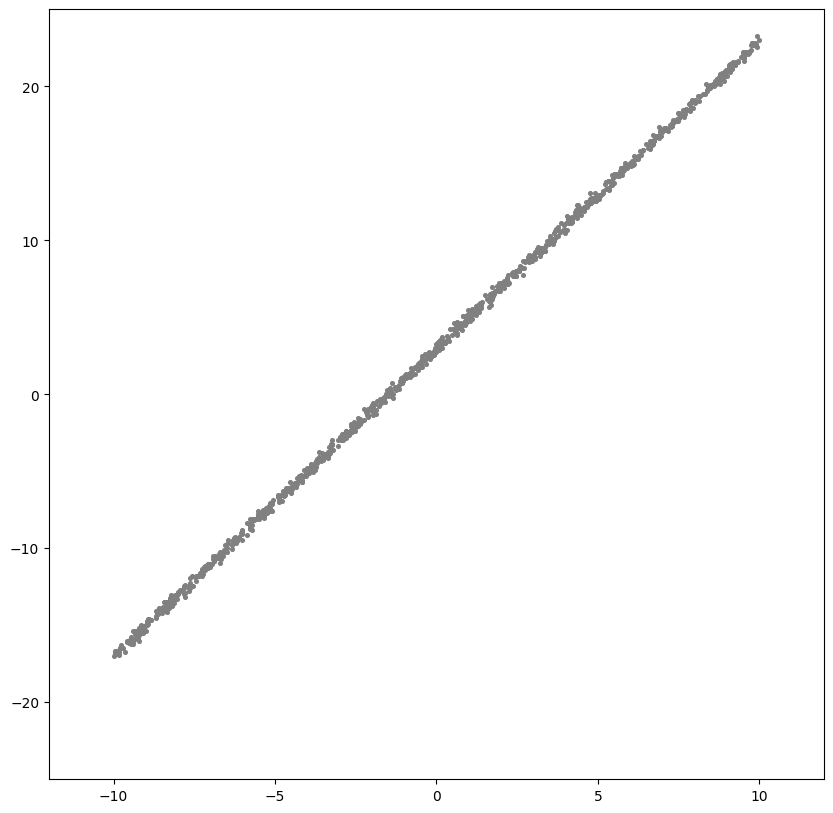

In [4]:
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html
# matplotlib의 scatter 함수를 사용해 학습 데이터를 확인합니다.

# figure의 크기를 지정해줍니다.
plt.figure(figsize=(10,10))

# x축에는 x를 사용하고 y축에는 y_noise를 사용해 scatter plot 해줍니다.
# 이때 점의 크기는 7, 점의 색상은 회색으로 임의로 지정했습니다.
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")

# figure의 x,y 축 범위를 지정해줍니다.
plt.axis([-12, 12, -25, 25])

# figure를 출력합니다.
plt.show()

## 모델, 손실함수, 최적화 함수 설정

In [5]:
# 선형 모델을 생성합니다.
# 입력으로 들어오는 x가 1000x1 의 형태를 가지고 있고 여기서 특성의 개수는 1개이기 때문에 앞에 1이 들어가게 됩니다. Linear(1,?)
# 출력으로 기대하는 값 또한 1000x1 의 형태이기 때문에 특성의 개수가 1개. 그렇기 때문에 뒤에 1이 들어갑니다.      Linear(?,1)
model = nn.Linear(1,1)

# 손실 함수를 지정해줍니다.
# 임의로 L1 손실을 사용했습니다.
loss_func = nn.L1Loss()

# 최적화 함수를 지정해줍니다.
# 이때 인수로 학습의 대상이 되는 모델의 변수(model.parameters())를 전달합니다.
# 또한 학습률은 0.01로 임의로 지정했습니다.
optimizer = optim.SGD(model.parameters(),lr=0.01)

## 모델 학습 및 중간 확인

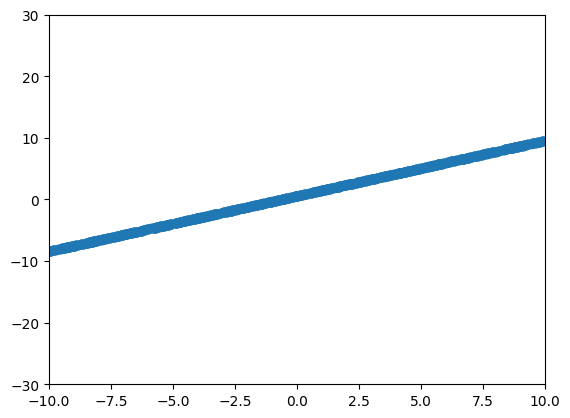

tensor(5.5957)


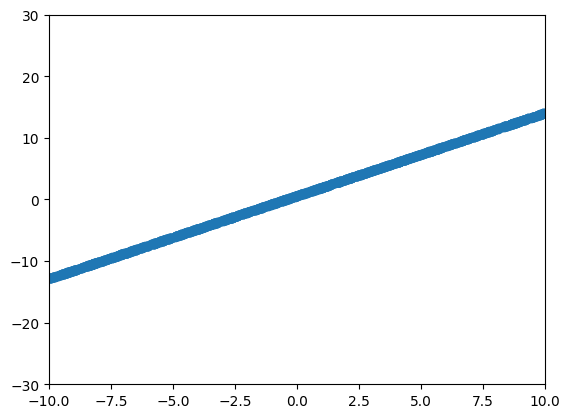

tensor(3.6068)


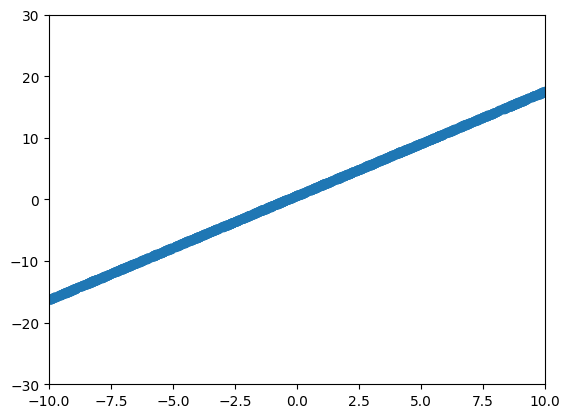

tensor(2.3897)


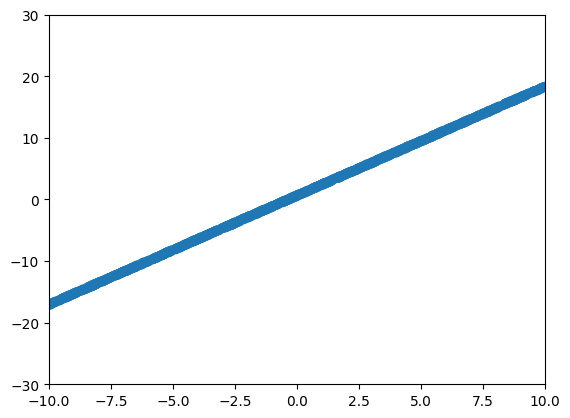

tensor(2.2261)


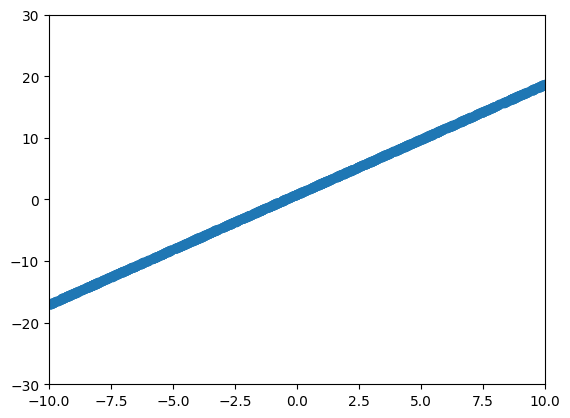

tensor(2.1294)


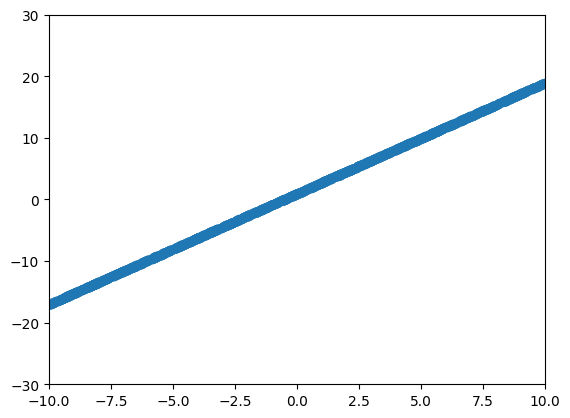

tensor(2.0333)


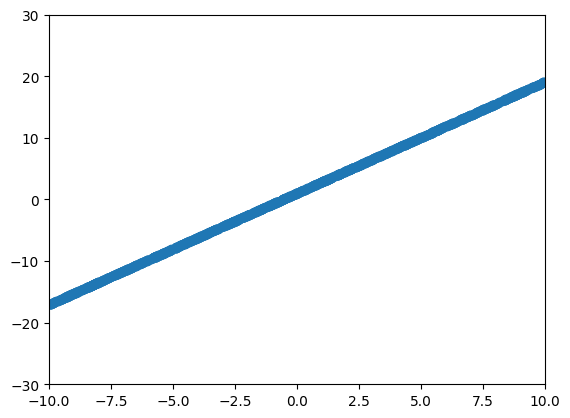

tensor(1.9372)


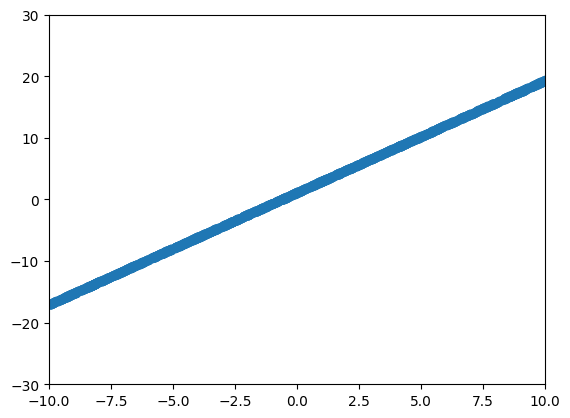

tensor(1.8412)


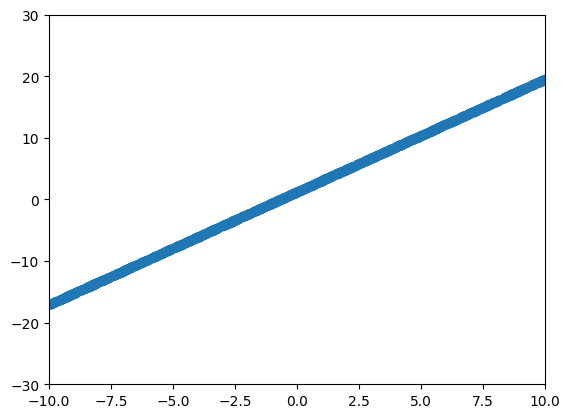

tensor(1.7451)


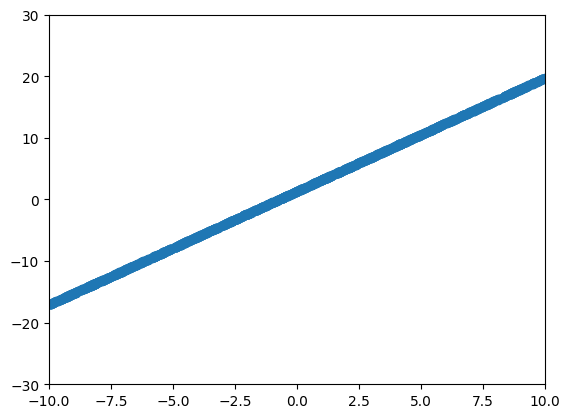

tensor(1.6491)


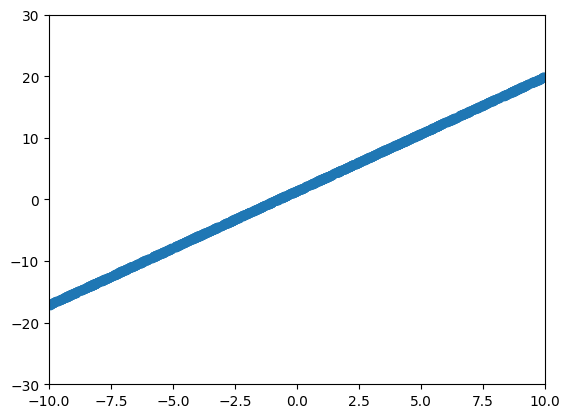

tensor(1.5531)


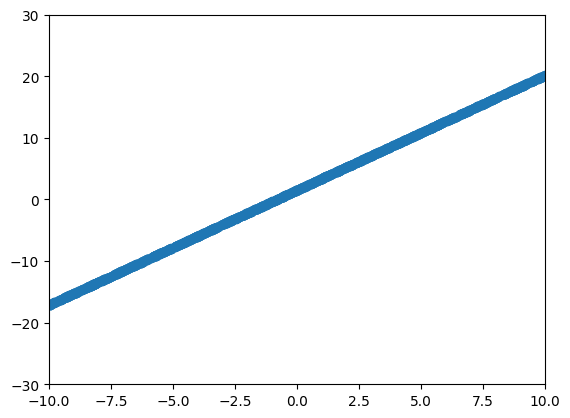

tensor(1.4572)


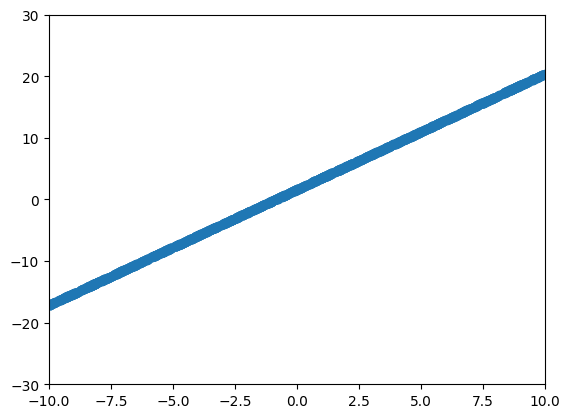

tensor(1.3612)


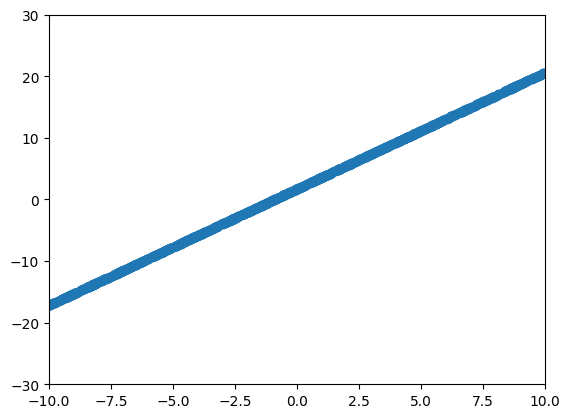

tensor(1.2652)


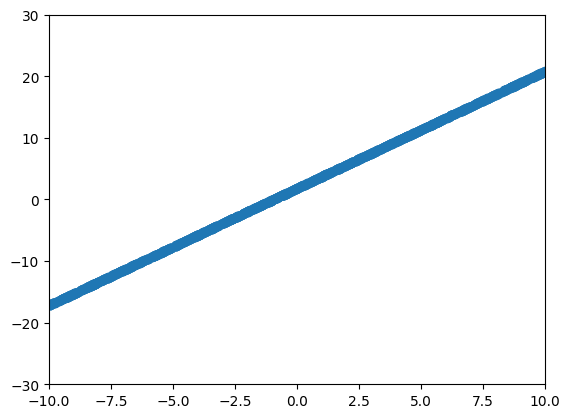

tensor(1.1693)


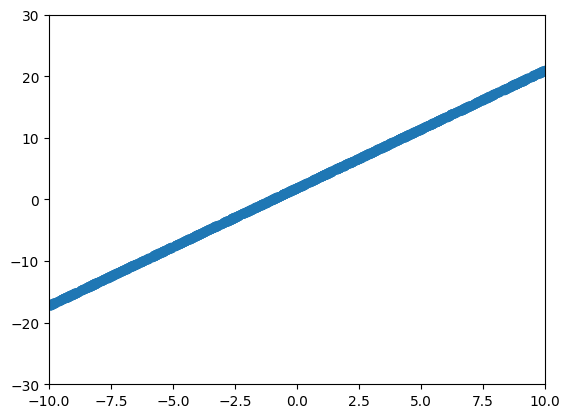

tensor(1.0733)


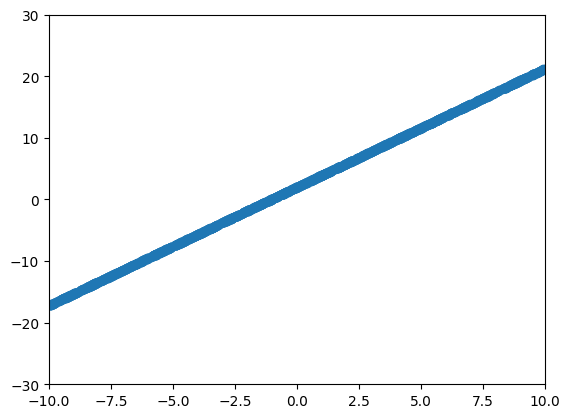

tensor(0.9775)


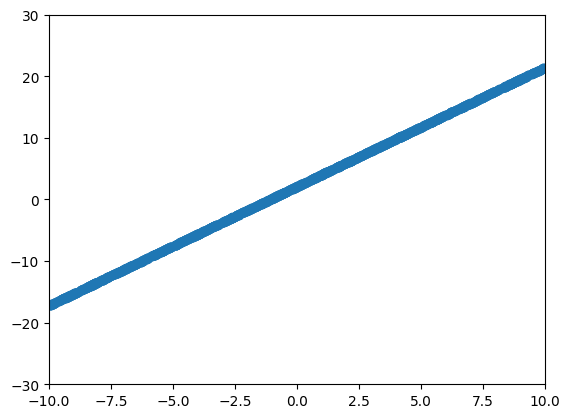

tensor(0.8817)


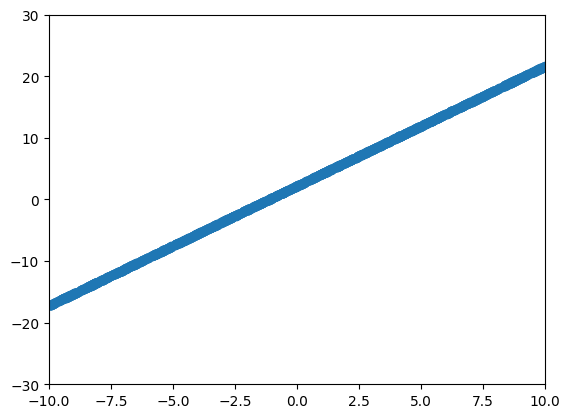

tensor(0.7859)


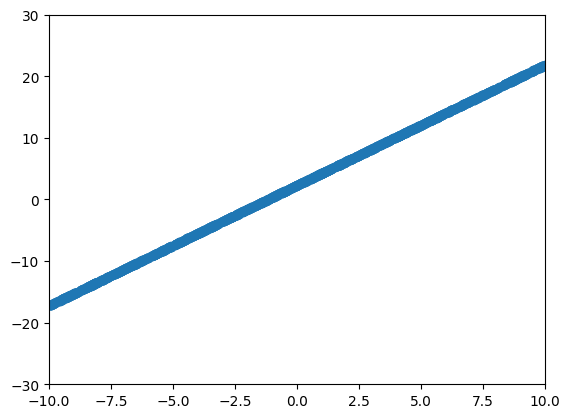

tensor(0.6901)


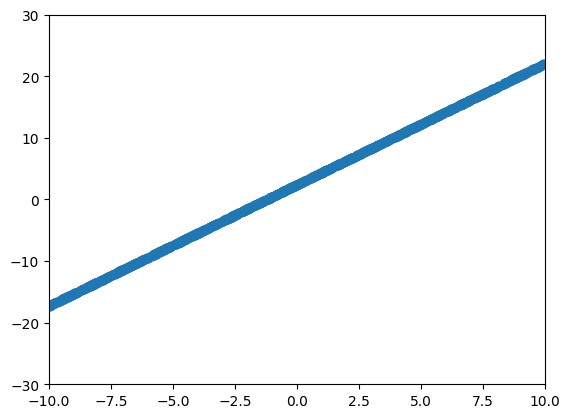

tensor(0.5944)


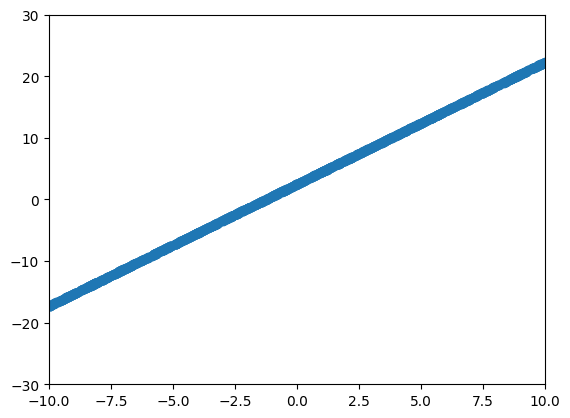

tensor(0.4995)


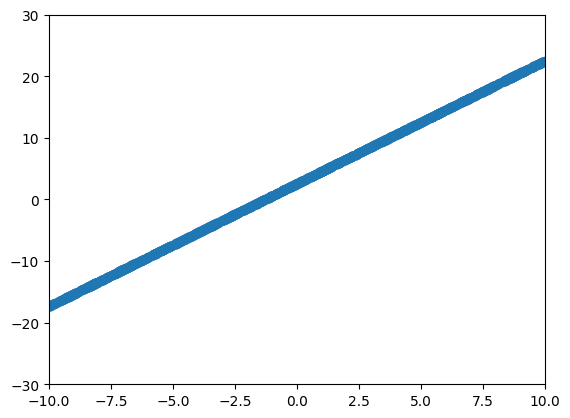

tensor(0.4071)


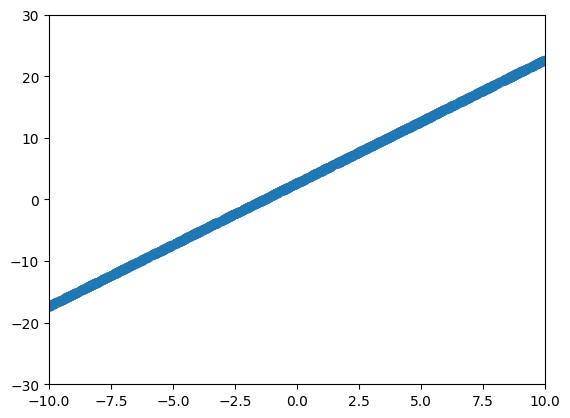

tensor(0.3222)


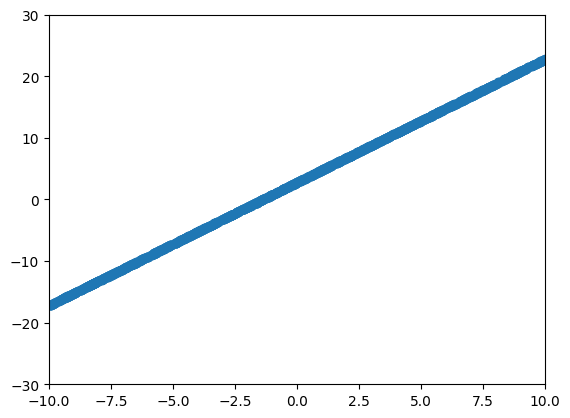

tensor(0.2547)


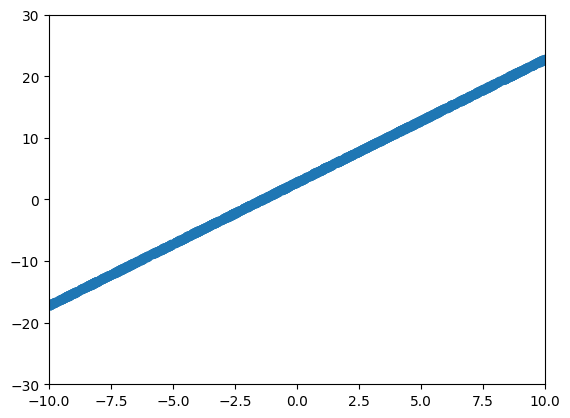

tensor(0.2108)


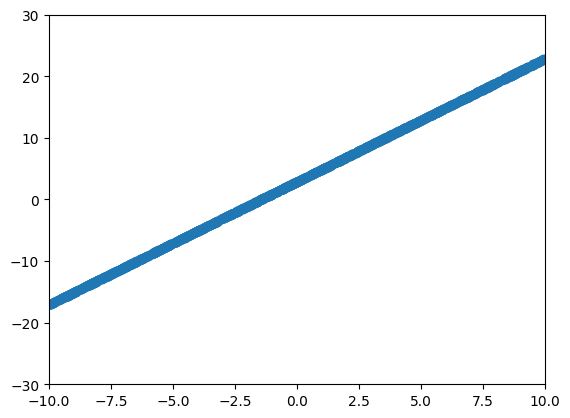

tensor(0.1854)


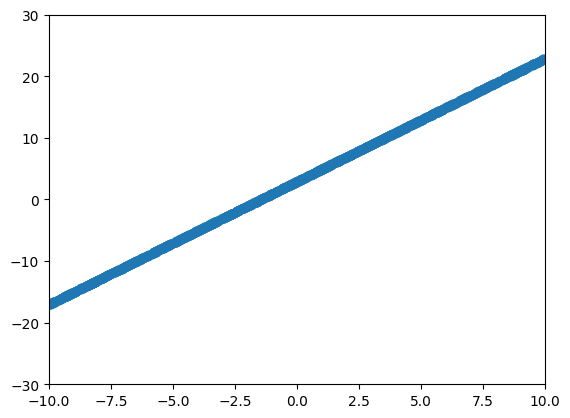

tensor(0.1727)


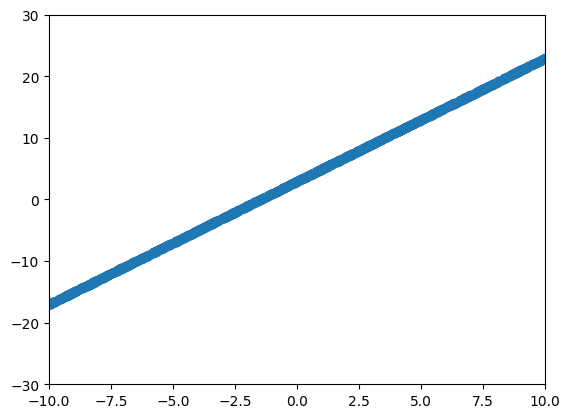

tensor(0.1665)


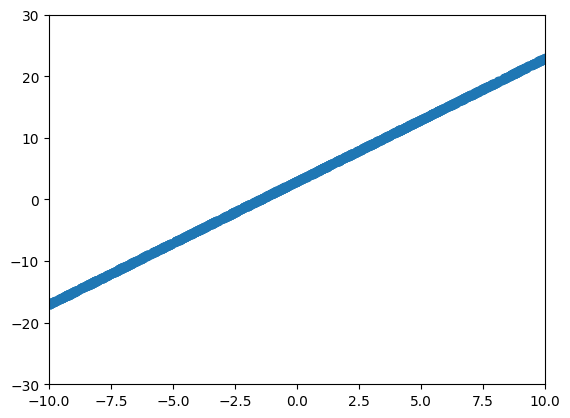

tensor(0.1636)


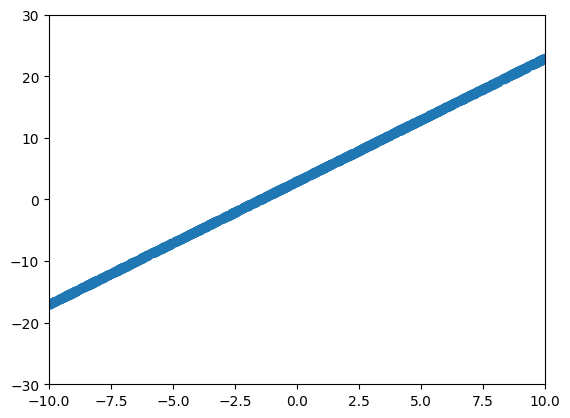

tensor(0.1621)


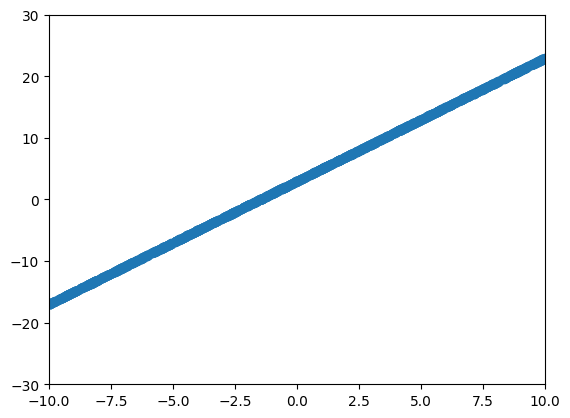

tensor(0.1614)


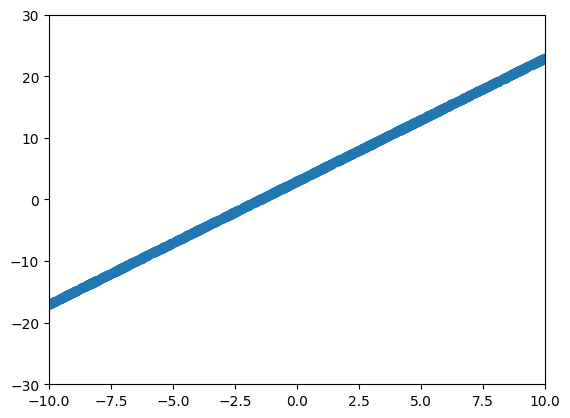

tensor(0.1611)


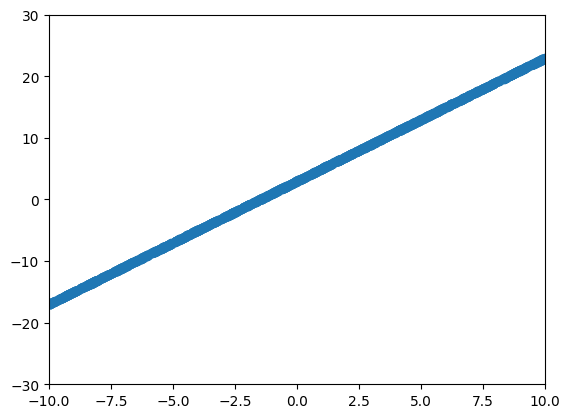

tensor(0.1610)


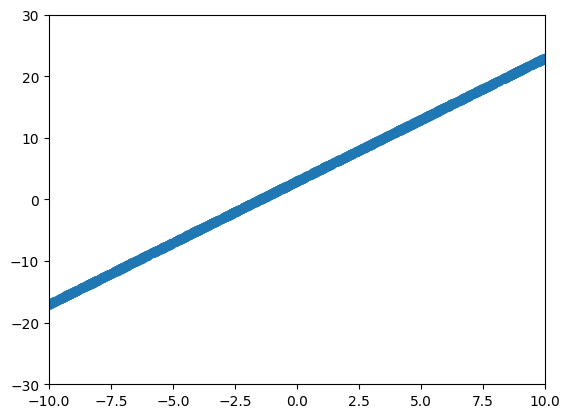

tensor(0.1610)


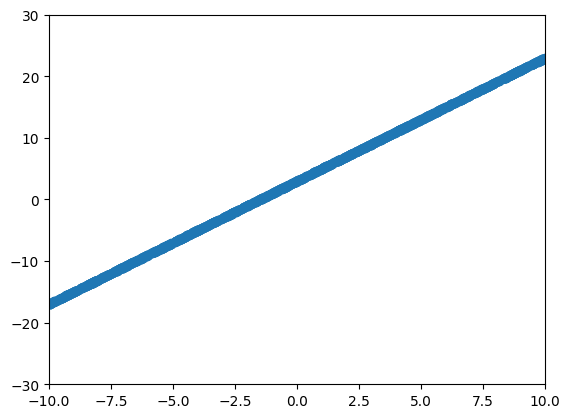

tensor(0.1610)


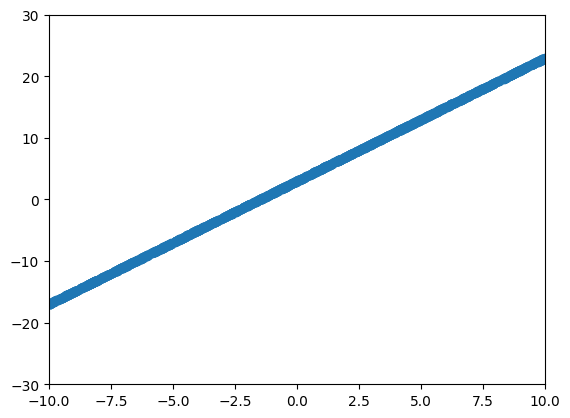

tensor(0.1609)


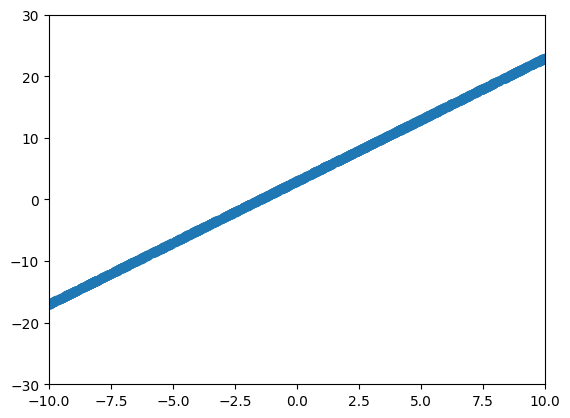

tensor(0.1609)


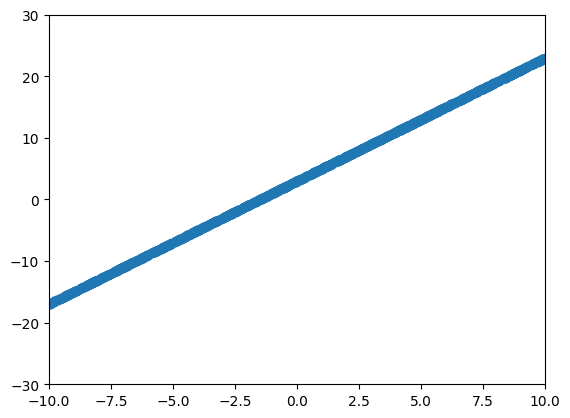

tensor(0.1609)


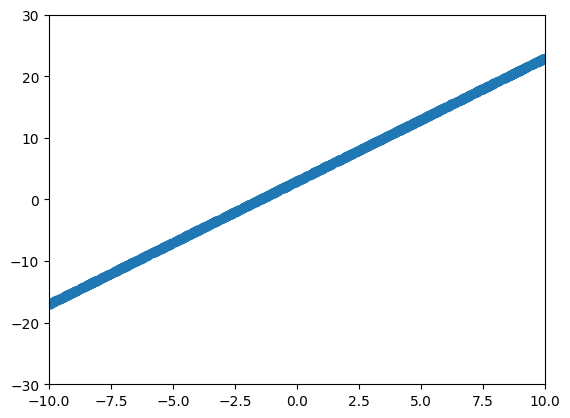

tensor(0.1609)


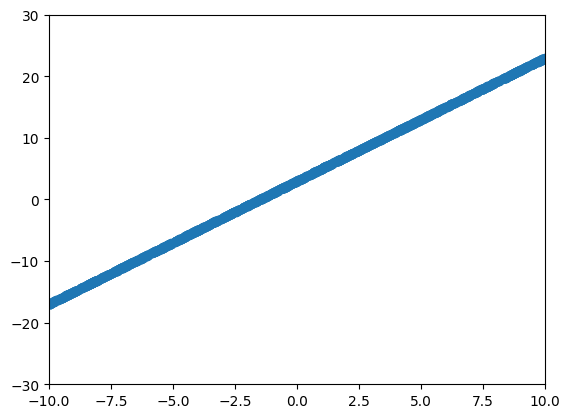

tensor(0.1609)


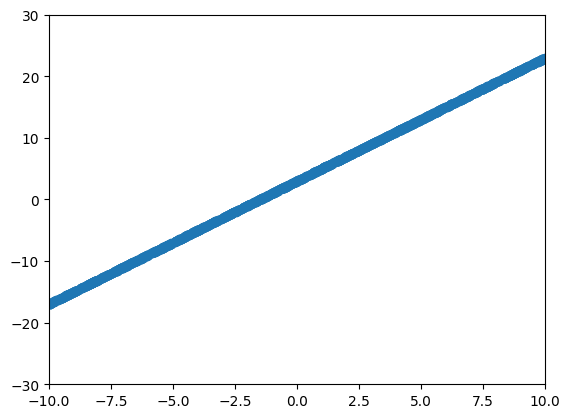

tensor(0.1609)


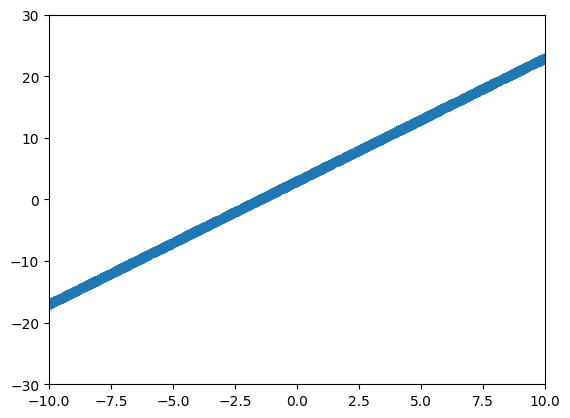

tensor(0.1609)


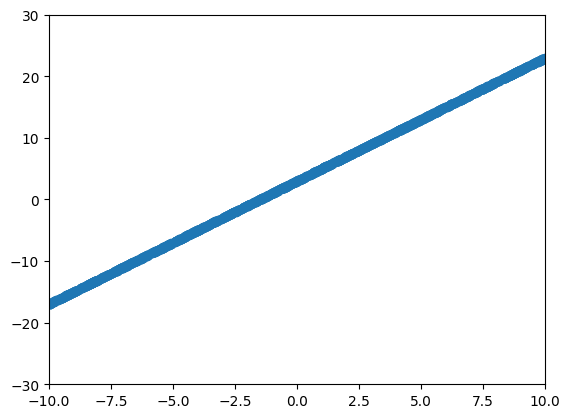

tensor(0.1609)


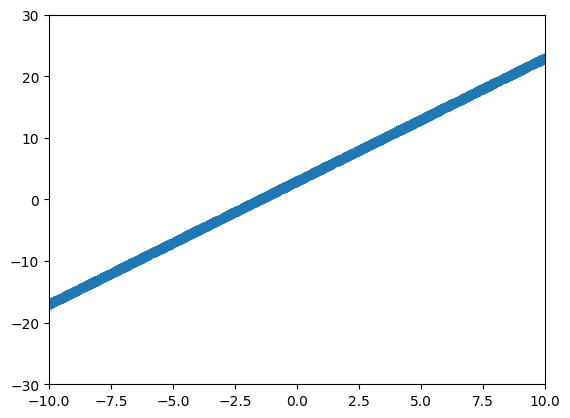

tensor(0.1609)


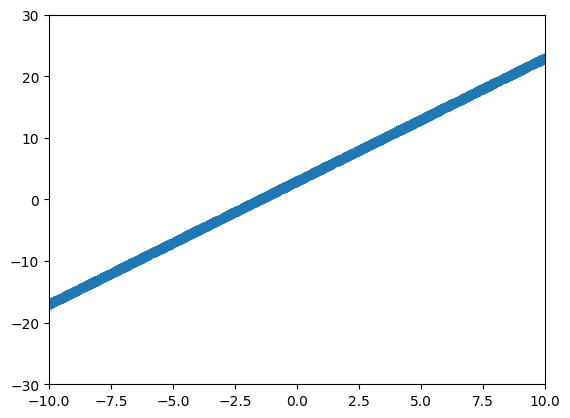

tensor(0.1609)


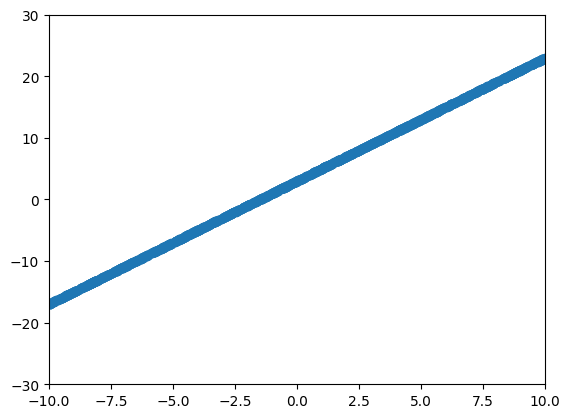

tensor(0.1609)


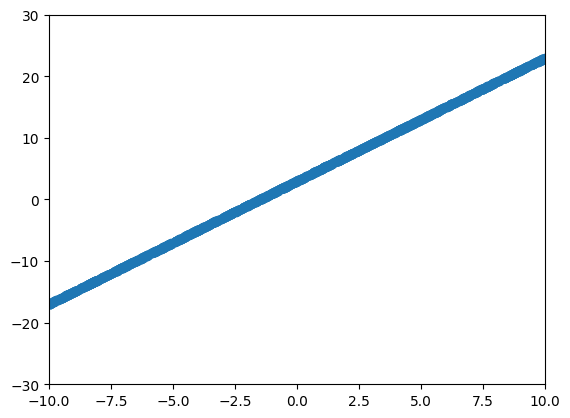

tensor(0.1609)


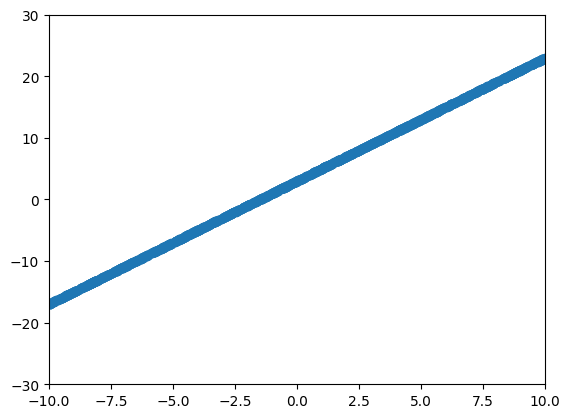

tensor(0.1609)


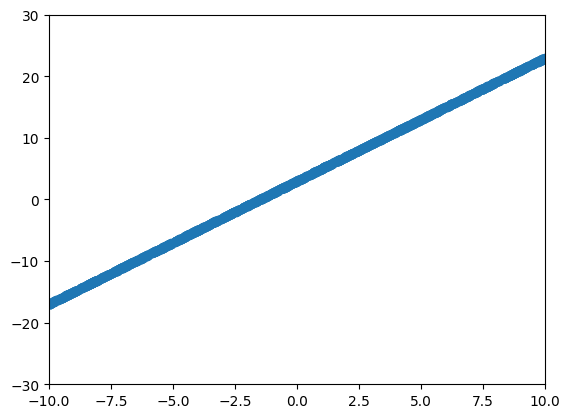

tensor(0.1609)


In [6]:
# 손실이 어떻게 변하는지 확인하기 위해 loss_arr를 만들어 기록합니다.
loss_arr =[]

# 또한 목표값은 y_noise로 지정해줍니다.
label = y_noise

# 500으로 지정했던 학습 횟수만큼 반복합니다.
for i in range(num_epoch):
  
    # 이전 학습의 기울기를 지우고 최적화 함수를 초기화해줍니다.
    # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않습니다.
    optimizer.zero_grad()
    
    # 입력값 x를 모델에 넣어 결과값을 얻습니다.
    output = model(x)
    
    # 결과값과 목표값의 차이를 L1 손실 함수로 구해줍니다.
    loss = loss_func(output,label)
    
    # 손실에 대한 기울기를 구합니다.
    loss.backward()
    
    # 구한 기울기를 이용해 모델의 변수를 업데이트 합니다.
    optimizer.step()
    
    # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력해줍니다.
    if i % 10 == 0:
        # https://pytorch.org/docs/stable/tensors.html?highlight=detach#torch.Tensor.detach
        # 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달합니다.
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.axis([-10, 10, -30, 30])
        plt.show()
        print(loss.data)
        
    # 손실을 loss_arr에 추가해줍니다.
    loss_arr.append(loss.detach().numpy())

## 학습 후 데이터와 모델 결과값 확인

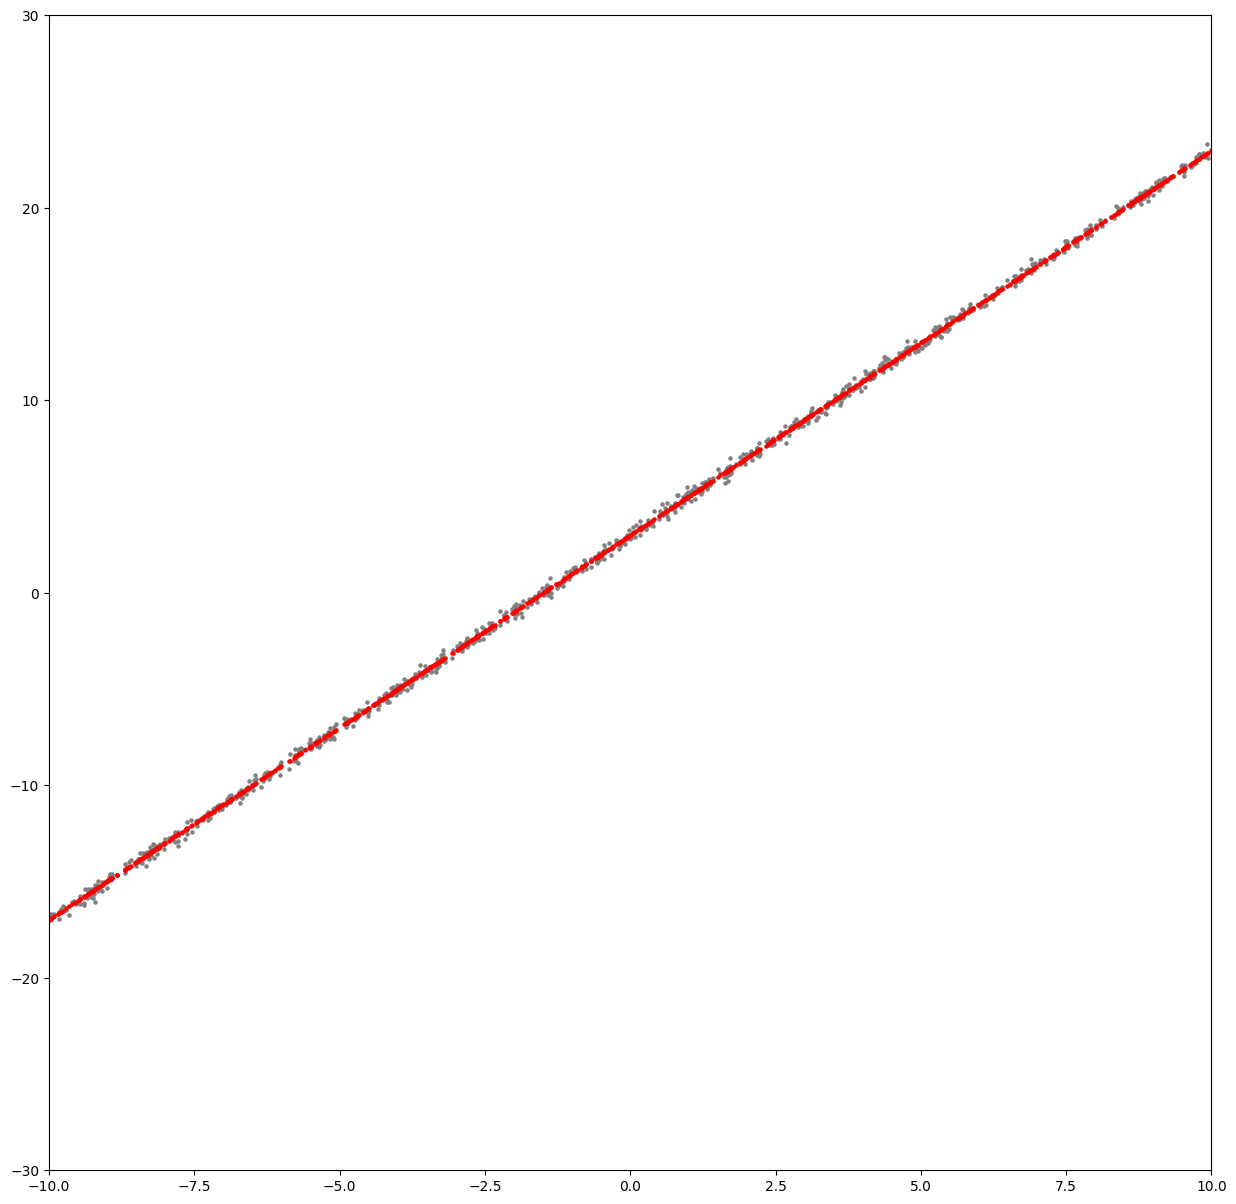

In [7]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

## 손실 그래프

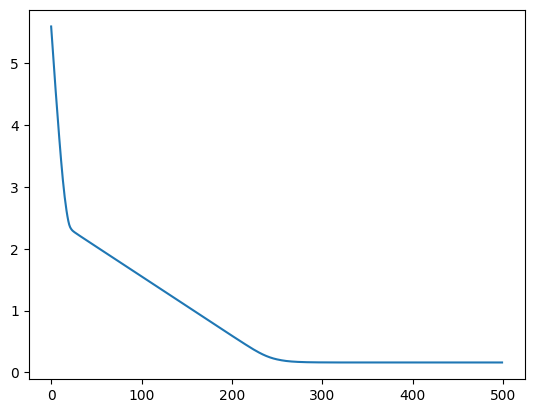

In [8]:
# matplotlib의 plot 함수를 이용해 손실이 어떻게 줄어가는지 확인합니다. 
plt.plot(loss_arr)
plt.show()

## 학습 후 모델 변수 값 확인

In [9]:
# 현재 모델은 weight와 bias을 변수로 가지고 있는데 그 값들이 학습 후 실제 몇인지 수치적으로 확인해봅니다.
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias:  ",param_list[1].item())

Weight: 1.998319387435913 
Bias:   2.99723482131958


# 인공신경망 모델의 학습

- 3장에서 설명한 부분을 제외하고 주석을 달았습니다.
- y = x^2+3

## 필요한 라이브러리 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터 생성

In [ ]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise

# 모델, 손실 함수, 최적화 함수 설정

In [ ]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

model = nn.Sequential(
          nn.Linear(1,6),
          nn.ReLU(),
          nn.Linear(6,10),
          nn.ReLU(),
          nn.Linear(10,6),
          nn.ReLU(),
          nn.Linear(6,1),
      )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

## 모델의 학습

In [ ]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

## 손실 그래프

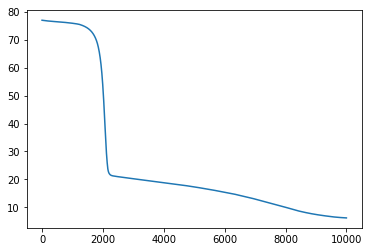

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

## 학습된 모델의 결과값과 실제 목표값의 비교

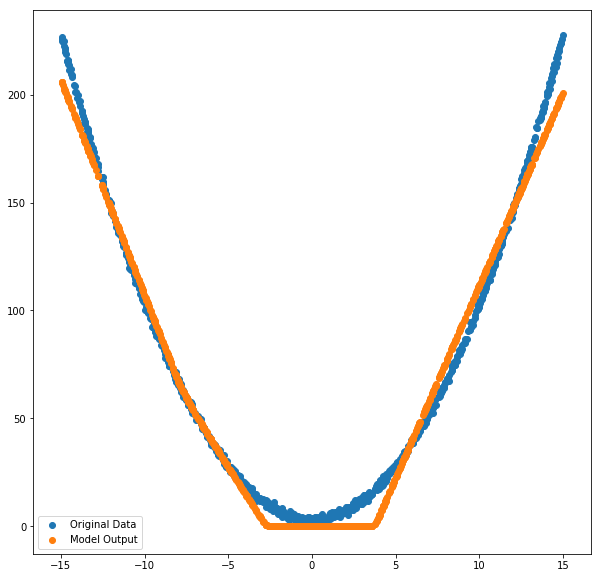

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()